In [100]:
import nltk
import random
import re
import csv
import urllib.request
import numpy as np
import pandas as pd
from nltk import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, manifold
import spacy

In [101]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# 下载停用词和分词器
nltk.download('stopwords')
nltk.download('punkt')

# 读取数据
data = pd.read_csv("clean_data_10000.csv")

# 去除标点符号和停用词
def preprocess_text(text):
    # 去除标点符号
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 分词
    tokens = word_tokenize(text.lower())
    # 去除停用词
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # 合并分词结果
    return " ".join(filtered_tokens)

# 对review/text列和Title列进行预处理
data["review/text"] = data["review/text"].apply(preprocess_text)
data["Title"] = data["Title"].apply(preprocess_text)

# 使用TF-IDF工程化数据
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data["review/text"])
y = data["Title"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


分开测试集和训练集

In [102]:
data

,Title,review/text
0,art well hung,julie strain fans collection photos 80 pages w...
1,dr seuss american icon,dont care much dr seuss reading philip nels bo...
2,dr seuss american icon,people become books read child father man dr s...
3,dr seuss american icon,theodore seuss geisel 19041991 aka quotdr seus...
4,dr seuss american icon,philip nel dr seuss american iconthis basicall...
...,...,...
9995,different brains different learners reach hard...,great book teachers well parents helps underst...
9996,different brains different learners reach hard...,book lacks depth seems promise illustrations l...
9997,different brains different learners reach hard...,chapters set like pamplet bulleted information...
9998,different brains different learners reach hard...,second edition eric jensens different brains d...


In [103]:
from sklearn.model_selection import train_test_split
x = data['review/text']
y = data['Title']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

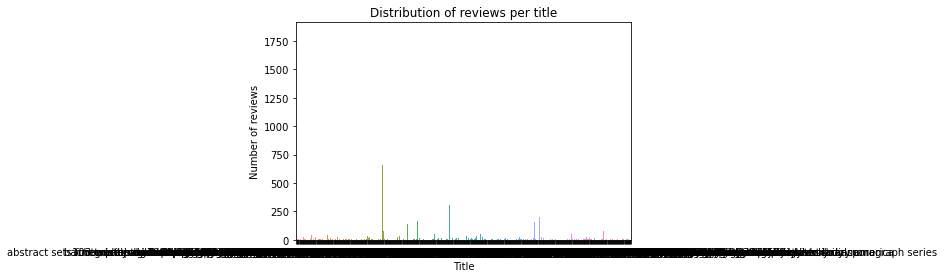

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# group the data by 'Title' and count the number of reviews for each title
reviews_per_title = data.groupby('Title')['review/text'].count()

# create a barplot using seaborn
sns.barplot(x=reviews_per_title.index, y=reviews_per_title.values)

# set the axis labels and title
plt.xlabel('Title')
plt.ylabel('Number of reviews')
plt.title('Distribution of reviews per title')

# show the plot
plt.show()



# Cross validation -- Confusion Matrix and accuracy

In [106]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score,  cross_val_predict, StratifiedKFold

def analysis(pipeline, data, label, x_train, x_test, y_train, y_test):

     #confusion matrix
    pipeline.fit(x_train, y_train)
    pred = pipeline.predict(x_test)
    cf_matrix = confusion_matrix(y_test, pred)
    print('The confusion matrix is:')
    print(cf_matrix)
    #draw_confusion_matrix(cf_matrix)

    #cross validation
    cv = StratifiedKFold(n_splits=10)

    y_pred = cross_val_predict(pipeline, data, label, cv=cv)
    accuracy = np.mean(label == y_pred)
    print('Accuracy:' + str(accuracy))

    print (classification_report(label, y_pred))

In [105]:
import matplotlib.pyplot as plt
def draw_confusion_matrix(cf_matrix):
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y, yticklabels=y)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


# KNN -- find best k with BOW, TFIDF and N-gram


The report for KNN with TF-IDF
The best value k is 3
The confusion matrix is:
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy:0.7756


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                      precision    recall  f1-score   support

                                                                                            101 ways market books publishers authors       0.00      0.00      0.00         1
                                                 103 great poems duallanguage book dover dual language german german english edition       0.29      0.67      0.40         3
                                                                            1999 facts blacks sourcebook africanamerican achievement       1.00      0.25      0.40         4
                                                                                                                     3ds max 4 bible       0.83      1.00      0.91        10
                                                                                                                          aarons 

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


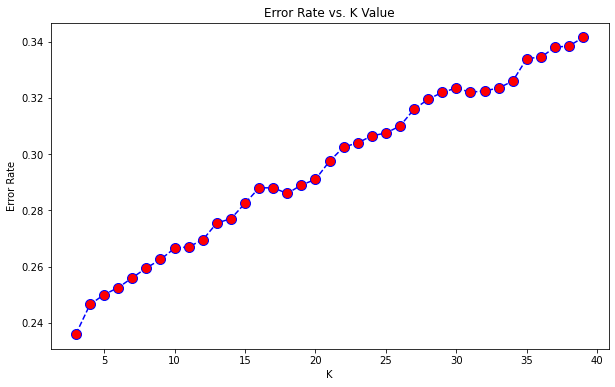

In [107]:
vectorizer_dict = {'TF-IDF':tfidf}

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


for key in vectorizer_dict:
    error_rate = []
    for i in range(3,40):
        knn_clf = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=i))
        ])

        knn_clf.fit(x_train, y_train)
        pred = knn_clf.predict(x_test)
        error_rate.append(np.mean(pred != y_test))
    # find the optimal K
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(range(3,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    best_k = error_rate.index(min(error_rate)) + 3

    best_knn = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=best_k))
        ])
    print('The report for KNN with ' + key)
    print('The best value k is ' + str(best_k))
    analysis(best_knn, x, y, x_train, x_test, y_train, y_test)
    print('')


Decision Tree – find best value of max_depth

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

for key in vectorizer_dict:

    dt_clf = Pipeline([('vect', vectorizer_dict[key]),
             ('dt', DecisionTreeClassifier())])


    # Define the hyperparameter search space
    param_grid = {'dt__max_depth': range(1, 11)}

    # Create the grid search object
    grid_search = GridSearchCV(dt_clf, param_grid, cv=5)

    # Fit the grid search to the data
    grid_search.fit(x, y)

    # Get the best hyperparameters
    best_depth = grid_search.best_params_['dt__max_depth']

    print('The report for DT with ' + key)
    print('The best value of max depth is ' + str(best_depth))

    best_dt = Pipeline([
        ('trans', vectorizer_dict[key]),
        ('clf',  DecisionTreeClassifier(max_depth = best_depth))
        ])

    analysis(best_dt, x, y, x_train, x_test, y_train, y_test)

    print('')
    print('')

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The report for DT with TF-IDF
The best value of max depth is 10
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy:0.387
                                                                                                               precision    recall  f1-score   support

                                                                                academic freedom september 11       0.00      0.00      0.00         5
                                                                                             alaska sourdough       1.00      0.93      0.96        27
                                              alternative chicago unique destinations beyond magnificent mile       0.00      0.00      0.00         2
                                                                                 america 1750 social portrait       0.00      0.00      0.00        18
                         ancient constitution feudal law study english historical thought seventeenth century       0.00      0.00      0.00         1
                                                                              

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn import svm

for key in vectorizer_dict:
    svc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', svm.SVC())
    ])

    print('The report for SVM.SVC with ' + key)
    analysis(svc_cfl, x, y, x_train, x_test, y_train, y_test)

    print('')
    print('')

The report for SVM.SVC with TF-IDF
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy:0.463
                                                                                                               precision    recall  f1-score   support

                                                                                academic freedom september 11       0.00      0.00      0.00         5
                                                                                             alaska sourdough       1.00      0.70      0.83        27
                                              alternative chicago unique destinations beyond magnificent mile       0.00      0.00      0.00         2
                                                                                 america 1750 social portrait       1.00      1.00      1.00        18
                         ancient constitution feudal law study english historical thought seventeenth century       0.00      0.00      0.00         1
                                                                              

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
